Plot vmax for different strains and substrates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import h5py

In [2]:
# import h5py
# f = h5py.File("filename", "r")
# f["input"].value, f["output"].value

pathstr="/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/output/isolates_assimilation.jld"
f=h5py.File(pathstr,"r")#, "rho", ρ_ps, "NSB", N_SB, "KD", K_D, "yEM", y_EM, "yDE", y_DEs, "NC", N_C)

#(ρ_ps,N_SB,K_D,y_EM,y_DEs,N_C)

Convert to vmax, formula from isolates_assimilation is Vmax = k_{cat} * NSB where k_{cat} is the Maximum substrate processing rate (bionumber 114686) = 180.0*60^2 (unit is s^-1) and NSB is  the Biomass-specific binding site density, calculated using  DEBmicroTrait.transporter_density_to_monomer_uptake_sites(V_cell, ρ_ps, Min_gen_time, Gram_stain)

In [3]:
NSB=np.array(f['NSB']) # mol gC-1, values for 39 strains (rows) on 83 substrates (columns)
kcat=180.0*60**2  #inverse hours https://bionumbers.hms.harvard.edu/bionumber.aspx?s=n&v=3&id=114686
Vmax_array=NSB*kcat # inverse hours




In [4]:
#Load names of strains and substrates for labels
exudates=pd.read_csv("/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/input/root_exudates.csv")
exudates.head() #want the "Name" column for plotting
strains=pd.read_csv("/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/input/isolates2traits.csv")
strains.head() #want the "Abbreviation" column for plotting

,Isolate,Abbreviation,Phylum,Class,NCBI_Taxon_ID,Repository,Repository_ID,Data_Type,Genome_size,Gene_count,...,OGT,Rhizosphere_response,z_sugars,z_organic_acids,z_fatty_acids,z_auxins,z_nucleotides,z_amino_acids,z_hydrolases,gram_stain
0,Acidobacteriaceae bacterium URHE0068,HE68,Acidobacteria,Acidobacteria,1380348,JGI IMG,2556921018,Genome,6679185,5623,...,21,positive,19,1,1,0,2,63,207,(-)
1,Bacillus sp. URHB0009,HB09,Firmicutes,Bacilli,1298866,JGI IMG,2522572150,Genome,5377210,5468,...,42,negative,58,14,12,2,13,99,71,(+)
2,Blastococcus sp. URHD0036,HD36,Actinobacteria,Actinobacteria,380356,JGI IMG,2561511235,Genome,5177578,5035,...,43,undefined,26,2,28,0,5,72,48,(+)
3,Bradyrhizobium sp. URHA0002,HA02,Proteobacteria,Alphaproteobacteria,298867,JGI IMG,2522572128,Genome,6972827,6819,...,22,positive,40,72,38,2,5,226,41,(-)
4,Bradyrhizobium sp. URHA0013,HA13,Proteobacteria,Alphaproteobacteria,1380352,JGI IMG,2546825533,Genome,7193102,6937,...,26,positive,66,65,31,3,6,242,55,(-)


In [5]:
#Load names of strains and substrates for labels
exudates=pd.read_csv("/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/input/root_exudates.csv")
exudates.head() #want the "Name" column for plotting
strains=pd.read_csv("/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/input/isolates2traits.csv")
strains.head() #want the "Abbreviation" column for plotting

,Isolate,Abbreviation,Phylum,Class,NCBI_Taxon_ID,Repository,Repository_ID,Data_Type,Genome_size,Gene_count,...,OGT,Rhizosphere_response,z_sugars,z_organic_acids,z_fatty_acids,z_auxins,z_nucleotides,z_amino_acids,z_hydrolases,gram_stain
0,Acidobacteriaceae bacterium URHE0068,HE68,Acidobacteria,Acidobacteria,1380348,JGI IMG,2556921018,Genome,6679185,5623,...,21,positive,19,1,1,0,2,63,207,(-)
1,Bacillus sp. URHB0009,HB09,Firmicutes,Bacilli,1298866,JGI IMG,2522572150,Genome,5377210,5468,...,42,negative,58,14,12,2,13,99,71,(+)
2,Blastococcus sp. URHD0036,HD36,Actinobacteria,Actinobacteria,380356,JGI IMG,2561511235,Genome,5177578,5035,...,43,undefined,26,2,28,0,5,72,48,(+)
3,Bradyrhizobium sp. URHA0002,HA02,Proteobacteria,Alphaproteobacteria,298867,JGI IMG,2522572128,Genome,6972827,6819,...,22,positive,40,72,38,2,5,226,41,(-)
4,Bradyrhizobium sp. URHA0013,HA13,Proteobacteria,Alphaproteobacteria,1380352,JGI IMG,2546825533,Genome,7193102,6937,...,26,positive,66,65,31,3,6,242,55,(-)


In [6]:
#make Vmax a pandas dataframe
Vmax=pd.DataFrame(data=Vmax_array,columns=exudates.Name)
Vmax=Vmax.set_index(strains["Abbreviation"])
Vmax.head()

Name,2-aminoisobutyric acid,"2,3-Dihydroxybenzoic acid",3-Dehydroshikimic acid,5-aminovaleric acid,abscisic acid,adenine,adenosine,alanine,alpha-ketoglutaric acid,arginine,...,trans-ferulic acid,trigonelline,tryptophan,uracil,uridine,valine,vanillic acid,vanillin,xanthine,linoleic acid
Abbreviation,,,,,,,,,,,,,,,,,,,,,
HE68,0.034132,0.000278,0.000278,0.025599,0.000116,0.001137,0.000379,0.053055,0.000444,0.021188,...,0.000181,0.000274,0.010264,0.001421,0.000421,0.025599,0.000235,0.000232,0.001398,0.000096
HB09,0.261936,0.019003,0.019003,0.196452,0.007937,0.036079,0.012036,0.407154,0.030341,0.162601,...,0.012373,0.018739,0.078766,0.045099,0.013373,0.196452,0.016035,0.015891,0.044381,0.005603
HD36,0.086712,0.001236,0.001236,0.065034,0.000516,0.006316,0.002107,0.134786,0.001973,0.053828,...,0.000805,0.001219,0.026075,0.007896,0.002341,0.065034,0.001043,0.001033,0.007770,0.005951
HA02,0.031773,0.005193,0.005193,0.023830,0.002169,0.000737,0.000246,0.049389,0.008291,0.019724,...,0.003381,0.005121,0.009554,0.000922,0.000273,0.023830,0.004382,0.004343,0.000907,0.000943
HA13,0.033628,0.004634,0.004634,0.025221,0.001935,0.000875,0.000292,0.052271,0.007398,0.020875,...,0.003017,0.004569,0.010112,0.001093,0.000324,0.025221,0.003910,0.003875,0.001076,0.000760


Make a seaborn heat map for Vmax with each row being a strain and each column being a substrate

In [7]:
# # glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")
# # sns.heatmap(glue)
# Vmaxsns=sns.Vmax.pivot(index="Strain")

[Text(0.5, 80.7222222222222, 'Substrate'),
 Text(220.72222222222223, 0.5, 'Strain')]

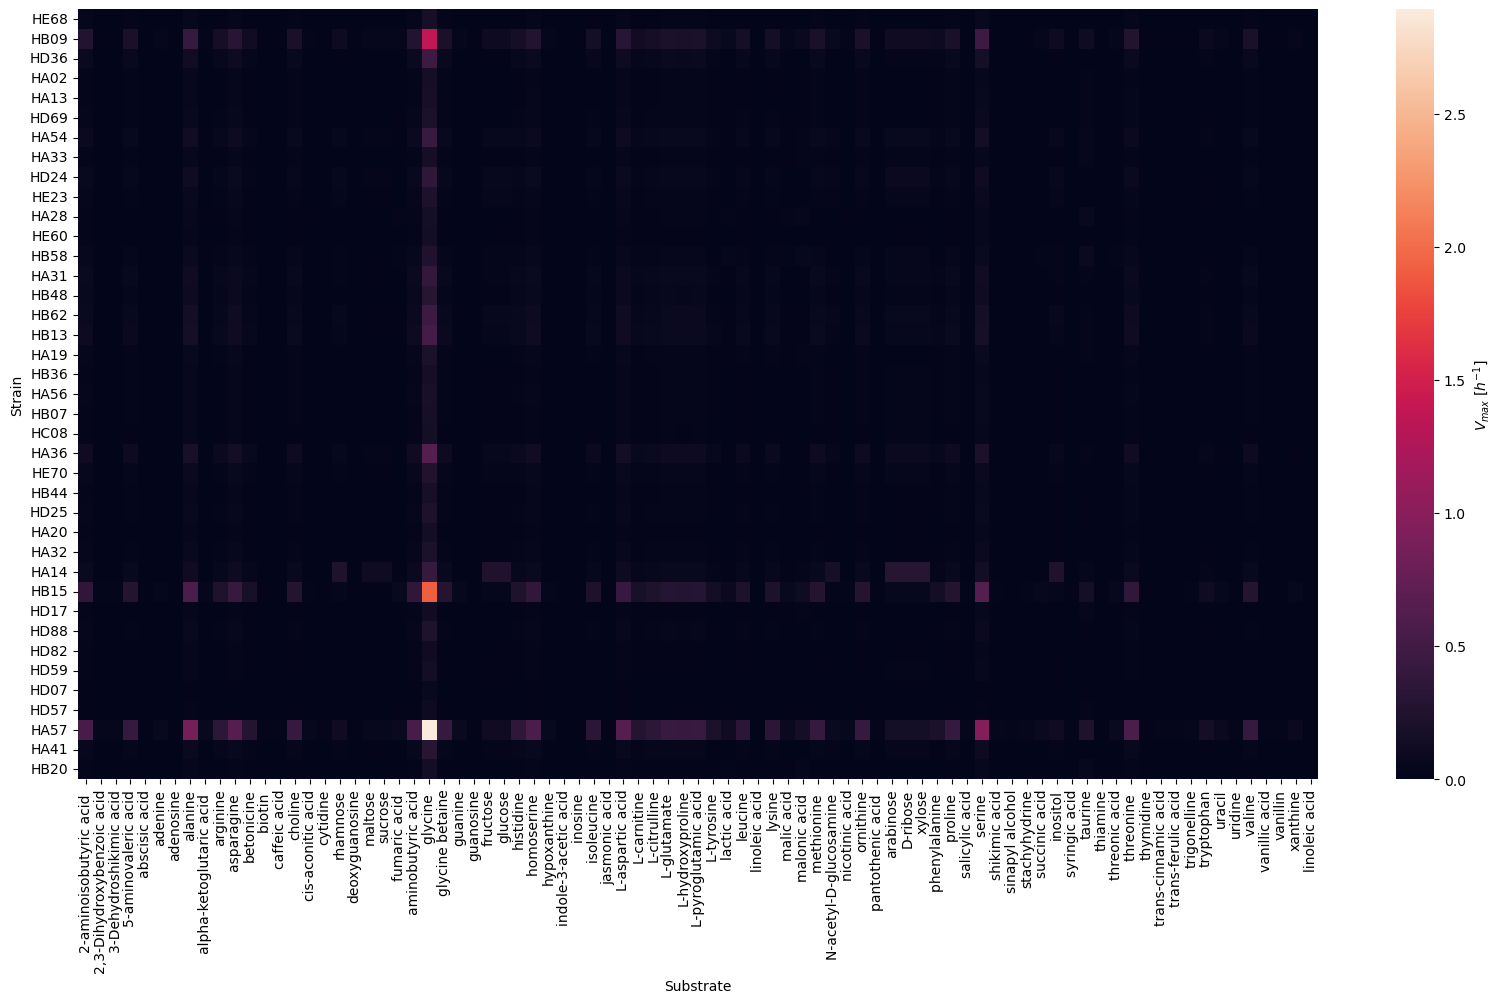

In [8]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(Vmax, annot=False,cbar_kws={'label': '$V_{max}$ $[h^{-1}]$'})
ax.set(xlabel="Substrate",ylabel="Strain")#, ylabel=strains["Abbreviation"])
# ax.xaxis.tick_top()


In [9]:
strains.columns

Index(['Isolate', 'Abbreviation', 'Phylum', 'Class', 'NCBI_Taxon_ID',
       'Repository', 'Repository_ID', 'Data_Type', 'Genome_size', 'Gene_count',
       'GC', 'rRNA_genes', 'tRNA_genes', 'Min_gen_time', 'Min_gen_time_meas',
       'OGT', 'Rhizosphere_response', 'z_sugars', 'z_organic_acids',
       'z_fatty_acids', 'z_auxins', 'z_nucleotides', 'z_amino_acids',
       'z_hydrolases', 'gram_stain'],
      dtype='object')

In [10]:
strains["Genome_size"]

0     6679185
1     5377210
2     5177578
3     6972827
4     7193102
5     6793945
6     7244804
7     5642219
8     4210445
9     4467545
10    4904121
11    6067264
12    5264264
13    5236918
14    4705879
15    5093035
16    4567713
17    3223982
18    4829548
19    6306952
20    6069513
21    7106298
22    4034872
23    7372737
24    7485871
25    6657122
26    4684622
27    4560838
28    7371174
29    6208105
30    8179139
31    6646877
32    6640086
33    6572728
34    2934896
35    2785891
36    2549675
37    8015544
38    6632341
Name: Genome_size, dtype: int64

<AxesSubplot: ylabel='Abbreviation'>

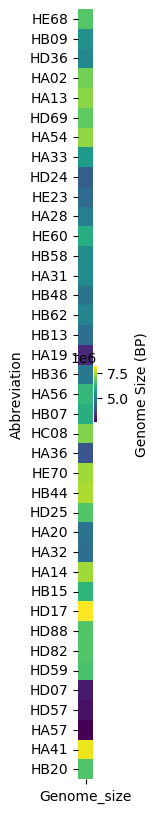

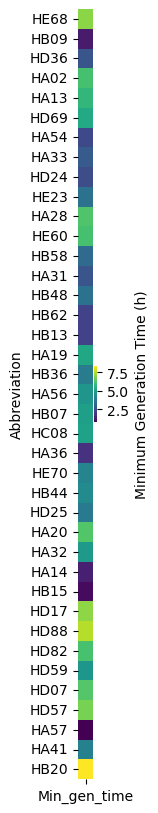

In [11]:
#make another heat map to display next to the above with cell size and minimum gen time
strains=strains.set_index(strains["Abbreviation"])
heat2=strains.loc[:, ['Genome_size']]
heat3=strains.loc[:, ['Min_gen_time']]

# heat2=pd.DataFrame({"Genome_Size": strains["Genome_size"]},
#                   index=strains["Abbreviation"])

# heat3=pd.DataFrame({"Min_Gen_Time": strains["Min_gen_time"]},
#                   index=strains["Abbreviation"])

fig, ax1 = plt.subplots(figsize=(20/83,10)) 
#fig, ax1 = plt.subplots() 
sns.heatmap(heat2, annot=False,cbar_kws={'label': 'Genome Size (BP)'},fmt="g", cmap='viridis')

fig, ax2 = plt.subplots(figsize=(20/83,10)) 
# fig, ax2 = plt.subplots() 
sns.heatmap(heat3, annot=False,cbar_kws={'label': 'Minimum Generation Time (h)'},fmt="g", cmap='viridis')


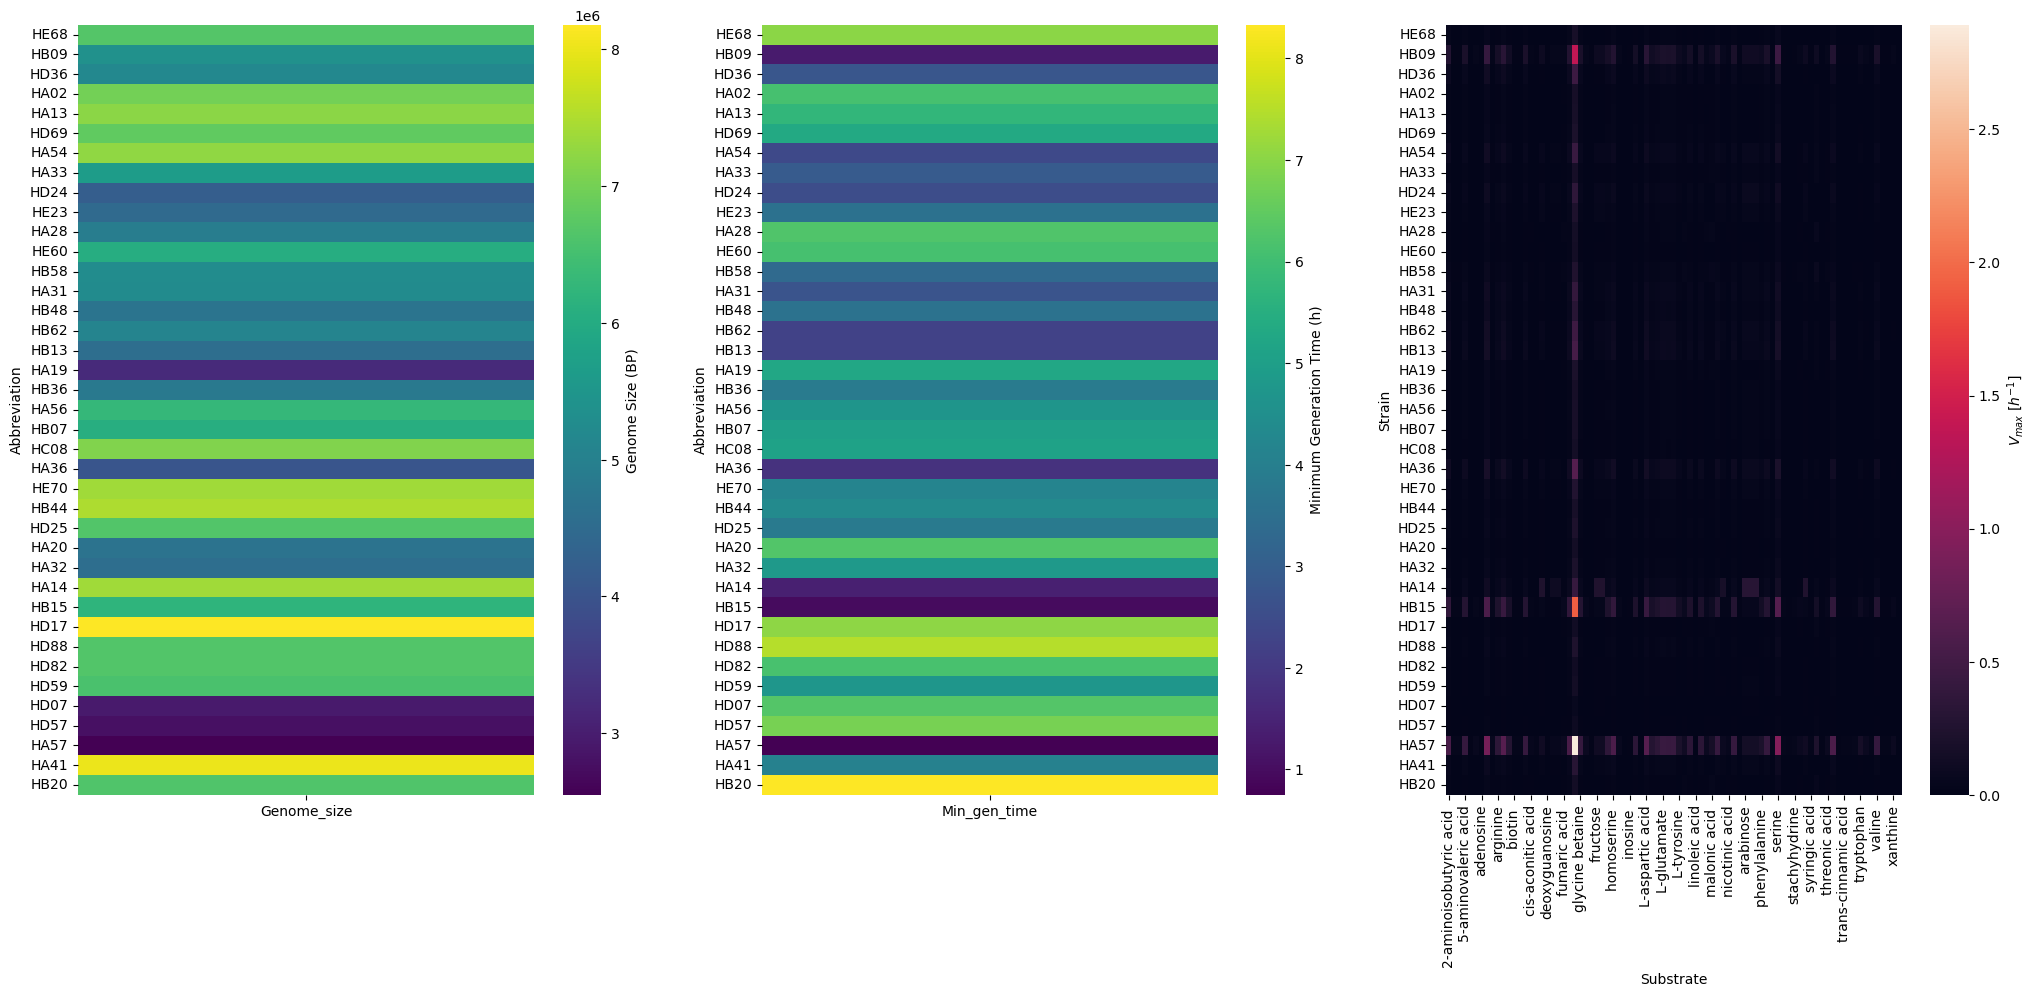

In [12]:
fig, ax =plt.subplots(1,3,figsize=(25,10))

sns.heatmap(heat2, annot=False,cbar_kws={'label': 'Genome Size (BP)'},fmt="g", cmap='viridis',ax=ax[0])
sns.heatmap(heat3, annot=False,cbar_kws={'label': 'Minimum Generation Time (h)'},fmt="g", cmap='viridis',ax=ax[1])
sns.heatmap(Vmax, annot=False,cbar_kws={'label': '$V_{max}$ $[h^{-1}]$'},ax=ax[2])
ax[2].set(xlabel="Substrate",ylabel="Strain")

# sns.heatmap(uniform_data, ax=ax[0])
# sns.heatmap(uniform_data2, ax=ax[1])

plt.show()


In [13]:
Vmax.head()

Name,2-aminoisobutyric acid,"2,3-Dihydroxybenzoic acid",3-Dehydroshikimic acid,5-aminovaleric acid,abscisic acid,adenine,adenosine,alanine,alpha-ketoglutaric acid,arginine,...,trans-ferulic acid,trigonelline,tryptophan,uracil,uridine,valine,vanillic acid,vanillin,xanthine,linoleic acid
Abbreviation,,,,,,,,,,,,,,,,,,,,,
HE68,0.034132,0.000278,0.000278,0.025599,0.000116,0.001137,0.000379,0.053055,0.000444,0.021188,...,0.000181,0.000274,0.010264,0.001421,0.000421,0.025599,0.000235,0.000232,0.001398,0.000096
HB09,0.261936,0.019003,0.019003,0.196452,0.007937,0.036079,0.012036,0.407154,0.030341,0.162601,...,0.012373,0.018739,0.078766,0.045099,0.013373,0.196452,0.016035,0.015891,0.044381,0.005603
HD36,0.086712,0.001236,0.001236,0.065034,0.000516,0.006316,0.002107,0.134786,0.001973,0.053828,...,0.000805,0.001219,0.026075,0.007896,0.002341,0.065034,0.001043,0.001033,0.007770,0.005951
HA02,0.031773,0.005193,0.005193,0.023830,0.002169,0.000737,0.000246,0.049389,0.008291,0.019724,...,0.003381,0.005121,0.009554,0.000922,0.000273,0.023830,0.004382,0.004343,0.000907,0.000943
HA13,0.033628,0.004634,0.004634,0.025221,0.001935,0.000875,0.000292,0.052271,0.007398,0.020875,...,0.003017,0.004569,0.010112,0.001093,0.000324,0.025221,0.003910,0.003875,0.001076,0.000760


In [14]:
Vmax.columns

Index(['2-aminoisobutyric acid ', '2,3-Dihydroxybenzoic acid',
       '3-Dehydroshikimic acid', '5-aminovaleric acid', 'abscisic acid',
       'adenine', 'adenosine', 'alanine', 'alpha-ketoglutaric acid ',
       'arginine', 'asparagine ', 'betonicine', 'biotin ', 'caffeic acid',
       'choline', 'cis-aconitic acid', 'cytidine', 'rhamnose',
       'deoxyguanosine', 'maltose', 'sucrose', 'fumaric acid ',
       'aminobutyric acid', 'glycine ', 'glycine betaine', 'guanine',
       'guanosine', 'fructose', 'glucose', 'histidine', 'homoserine ',
       'hypoxanthine', 'indole-3-acetic acid', 'inosine ', 'isoleucine ',
       'jasmonic acid', 'L-aspartic acid', 'L-carnitine', 'L-citrulline',
       'L-glutamate ', 'L-hydroxyproline', 'L-pyroglutamic acid',
       'L-tyrosine ', 'lactic acid', 'leucine', 'linoleic acid', 'lysine',
       'malic acid', 'malonic acid ', 'methionine ', 'N-acetyl-D-glucosamine ',
       'nicotinic acid', 'ornithine', 'pantothenic acid ', 'arabinose',
       'D-

In [15]:
Vmax.loc["HA57","glycine "] #for some reason some of the substrate n

2.8925819284945375

Mu max from minimum generation time

In [16]:
heat3["mumax"]=np.log(2)/heat3["Min_gen_time"]
heat3.head()

,Min_gen_time,mumax
Abbreviation,,
HE68,7.00,0.099021
HB09,1.31,0.529120
HD36,2.78,0.249334
HA02,6.09,0.113817
HA13,5.73,0.120968


In [17]:
names=["HA57","HB15","HB09","HA36","HA54","HB20"]

In [18]:
Vmax.loc[names,"glycine "] #for some reason some of the substrate n

Abbreviation
HA57    2.892582
HB15    1.916431
HB09    1.370593
HA36    0.635992
HA54    0.437311
HB20    0.135611
Name: glycine , dtype: float64

In [19]:
heat3.loc[names,"mumax"]

Abbreviation
HA57    0.924196
HB15    0.722028
HB09    0.529120
HA36    0.380850
HA54    0.285246
HB20    0.083211
Name: mumax, dtype: float64

In [20]:
heat2.loc[names,"Genome_size"]

Abbreviation
HA57    2549675
HB15    6208105
HB09    5377210
HA36    4034872
HA54    7244804
HB20    6632341
Name: Genome_size, dtype: int64

In [21]:
strains.loc[names,"Class"]

Abbreviation
HA57                Bacilli
HB15    Gammaproteobacteria
HB09                Bacilli
HA36         Actinobacteria
HA54     Betaproteobacteria
HB20     Betaproteobacteria
Name: Class, dtype: object

In [22]:
exudates.head()

,Name,Formula,ChEBI_ID,Molecular_weight,Ontology
0,2-aminoisobutyric acid,C4H9NO2,27971,103.11980,Amino acids
1,"2,3-Dihydroxybenzoic acid",C7H6O4,18026,154.12010,Organic acids
2,3-Dehydroshikimic acid,C7H8O5,30918,172.13540,Organic acids
3,5-aminovaleric acid,C5H11NO2,15887,117.14638,Amino acids
4,abscisic acid,C15H20O4,2365,264.31690,Organic acids


##Change heatmap to box and whisker charts to show distribution of Vmax for each substrate

#Convert Vmax to array with one column for strain and one for substrate and one for Vmax

In [37]:
Vmax_new=Vmax.unstack().reset_index().rename(columns={"Name":"Substrate","Abbreviation":"Strain",0:"Vmax"})
Vmax_new.head()

,Substrate,Strain,Vmax
0,2-aminoisobutyric acid,HE68,0.034132
1,2-aminoisobutyric acid,HB09,0.261936
2,2-aminoisobutyric acid,HD36,0.086712
3,2-aminoisobutyric acid,HA02,0.031773
4,2-aminoisobutyric acid,HA13,0.033628


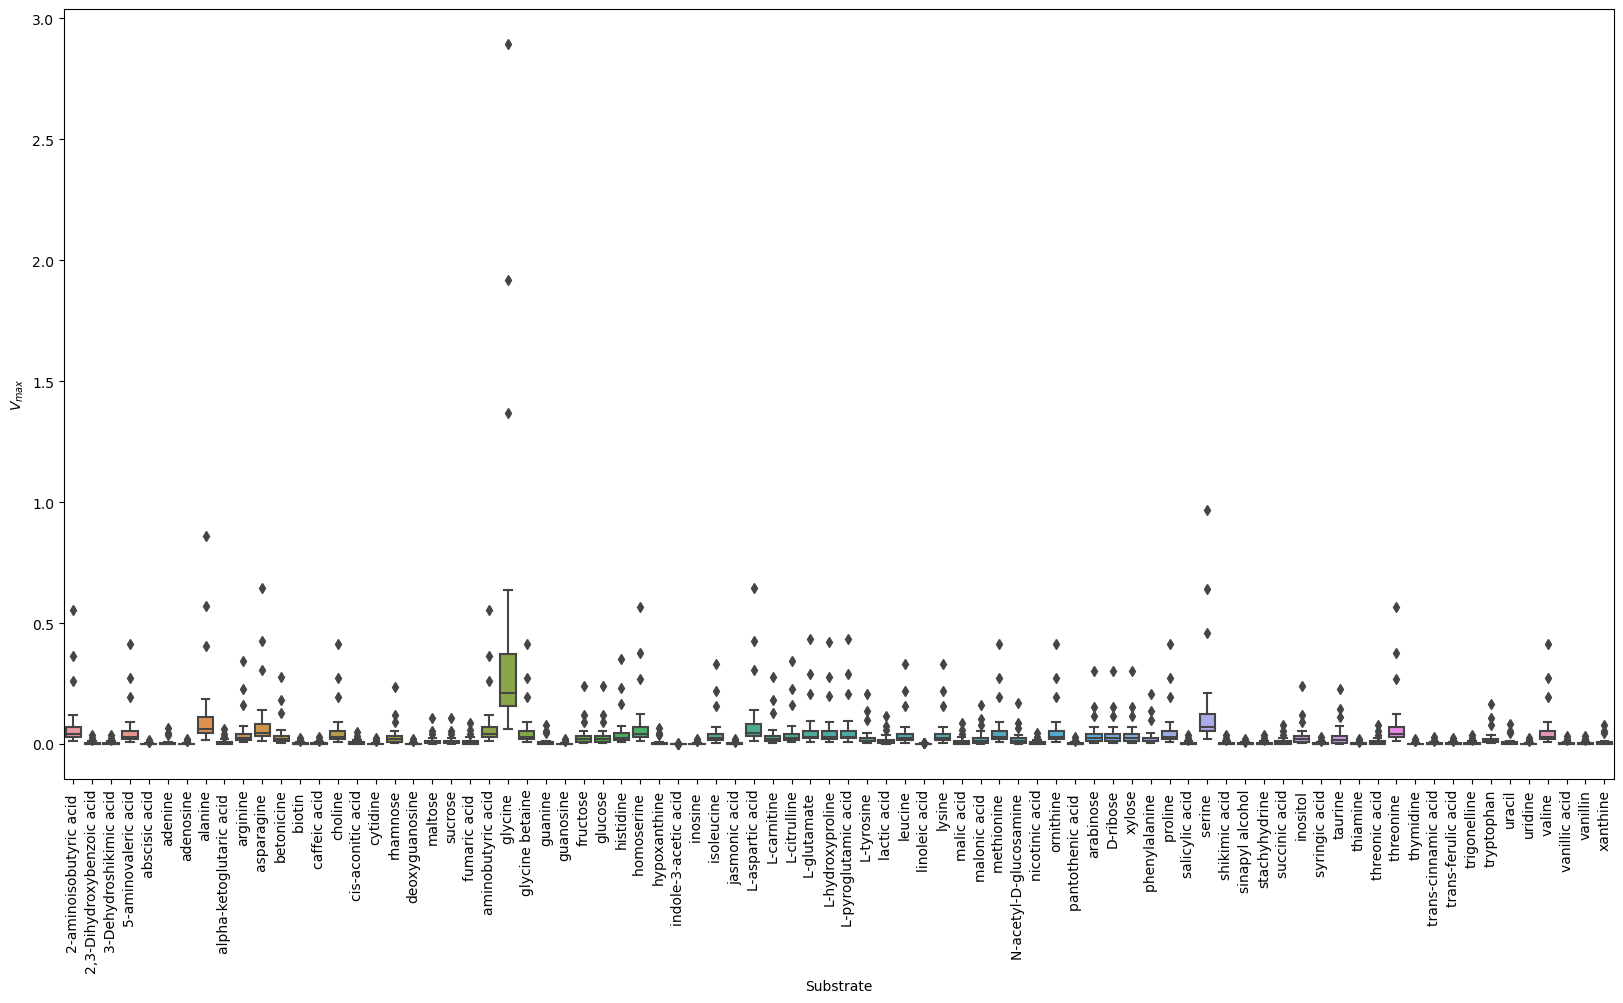

In [42]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.boxplot(data=Vmax_new,x="Substrate",y="Vmax")#, annot=False,cbar_kws={'label': '$V_{max}$ $[h^{-1}]$'})
ax.set(xlabel="Substrate",ylabel="$V_{max}$")#, ylabel=strains["Abbreviation"])
ax.tick_params(axis='x', rotation=90)
# ax.xaxis.tick_top()

In [23]:
Vmax.head(6)

Name,2-aminoisobutyric acid,"2,3-Dihydroxybenzoic acid",3-Dehydroshikimic acid,5-aminovaleric acid,abscisic acid,adenine,adenosine,alanine,alpha-ketoglutaric acid,arginine,...,trans-ferulic acid,trigonelline,tryptophan,uracil,uridine,valine,vanillic acid,vanillin,xanthine,linoleic acid
Abbreviation,,,,,,,,,,,,,,,,,,,,,
HE68,0.034132,0.000278,0.000278,0.025599,0.000116,0.001137,0.000379,0.053055,0.000444,0.021188,...,0.000181,0.000274,0.010264,0.001421,0.000421,0.025599,0.000235,0.000232,0.001398,0.000096
HB09,0.261936,0.019003,0.019003,0.196452,0.007937,0.036079,0.012036,0.407154,0.030341,0.162601,...,0.012373,0.018739,0.078766,0.045099,0.013373,0.196452,0.016035,0.015891,0.044381,0.005603
HD36,0.086712,0.001236,0.001236,0.065034,0.000516,0.006316,0.002107,0.134786,0.001973,0.053828,...,0.000805,0.001219,0.026075,0.007896,0.002341,0.065034,0.001043,0.001033,0.007770,0.005951
HA02,0.031773,0.005193,0.005193,0.023830,0.002169,0.000737,0.000246,0.049389,0.008291,0.019724,...,0.003381,0.005121,0.009554,0.000922,0.000273,0.023830,0.004382,0.004343,0.000907,0.000943
HA13,0.033628,0.004634,0.004634,0.025221,0.001935,0.000875,0.000292,0.052271,0.007398,0.020875,...,0.003017,0.004569,0.010112,0.001093,0.000324,0.025221,0.003910,0.003875,0.001076,0.000760
HD69,0.040331,0.005065,0.005065,0.030249,0.002116,0.000220,0.000074,0.062691,0.008087,0.025036,...,0.003298,0.004995,0.012128,0.000275,0.000082,0.030249,0.004274,0.004235,0.000271,0.000630


In [44]:
batch=pd.read_csv("/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/output2/isolates_batch_model_all.csv")
batch.head()

,BGE,BP,BR,rgrowth,xenzyme,rGco2,rMco2,rXco2,jEX,jDE,...,alphaenz,gV0,kE,yEV,NSB,KD,yDE,monomer,ontology,eta
0,0.591660,7.888702e-09,2.961760e-09,0.059213,0.000457,0.000261,0.000088,2.014209e-06,0.000007,0.001366,...,0.007718,0.250941,0.990758,1.268776,5.267264e-08,0.008627,0.25,2-aminoisobutyric acid,Amino acids,0.0
1,0.380744,3.192556e-08,1.684607e-08,0.127318,0.000419,0.000630,0.000008,2.072272e-06,0.000002,0.001126,...,0.003288,0.366392,2.247729,2.270981,4.042216e-07,0.037817,0.25,2-aminoisobutyric acid,Amino acids,0.0
2,0.475350,1.560388e-08,7.346933e-09,0.097510,0.000225,0.000470,0.000009,1.085467e-06,0.000002,0.001211,...,0.002309,0.286430,1.695966,1.643836,1.338154e-07,0.011892,0.25,2-aminoisobutyric acid,Amino acids,0.0
3,0.590325,7.447495e-09,3.213237e-09,0.057814,0.000085,0.000253,0.000117,3.711103e-07,0.000001,0.001369,...,0.001464,0.254230,1.088478,1.268776,4.903302e-08,0.008646,0.25,2-aminoisobutyric acid,Amino acids,0.0
4,0.590507,7.873335e-09,3.351377e-09,0.060674,0.000116,0.000246,0.000148,4.680717e-07,0.000002,0.001378,...,0.001904,0.255835,1.132664,1.268776,5.189505e-08,0.009530,0.25,2-aminoisobutyric acid,Amino acids,0.0


##variance partitioning for Vmax